In [80]:
from utils import *
import pandas as pd
import os

# Overview of the immigration data

## preprocess data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = "2023_0818_plcy_yearbook_lawful_permanent_residents_fy2022.xlsx"
df_all_immigrants = pd.read_excel(file_path, sheet_name='Table 2', skiprows=4, header=1)
df_all_immigrants.set_index('Region and country of last residence1', inplace=True)
df_all_immigrants.dropna(how='all', inplace=True)
df_all_immigrants.index = df_all_immigrants.index.map(lambda x: ''.join(filter(str.isalpha, str(x))))
df_all_immigrants.index = df_all_immigrants.index.str.replace(' ', '').str.replace(',', '')

# Print the updated index
print(type(df_all_immigrants.index))
print(df_all_immigrants.head())
print(df_all_immigrants.tail())

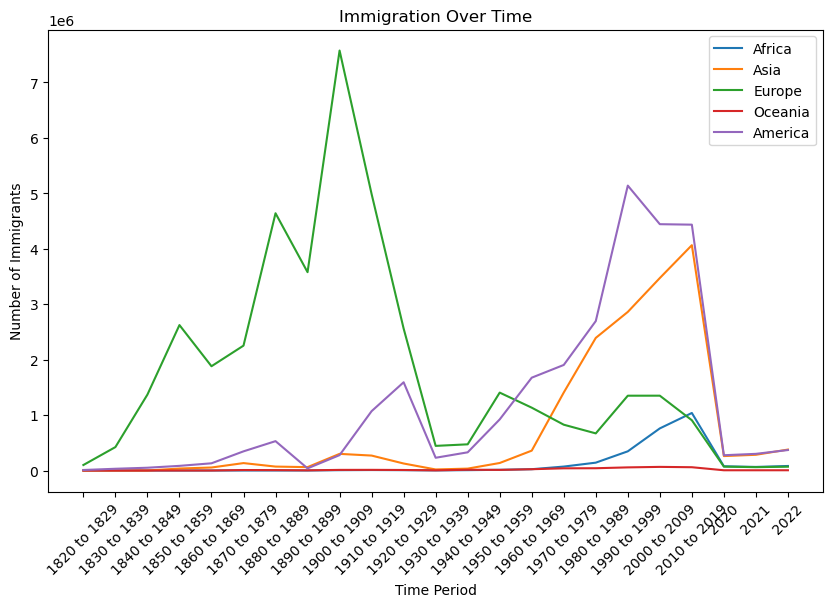

In [15]:
continents = ['Africa', 'Asia', 'Europe', 'Oceania', 'America']
plot_immigration_over_time(df_all_immigrants, continents)

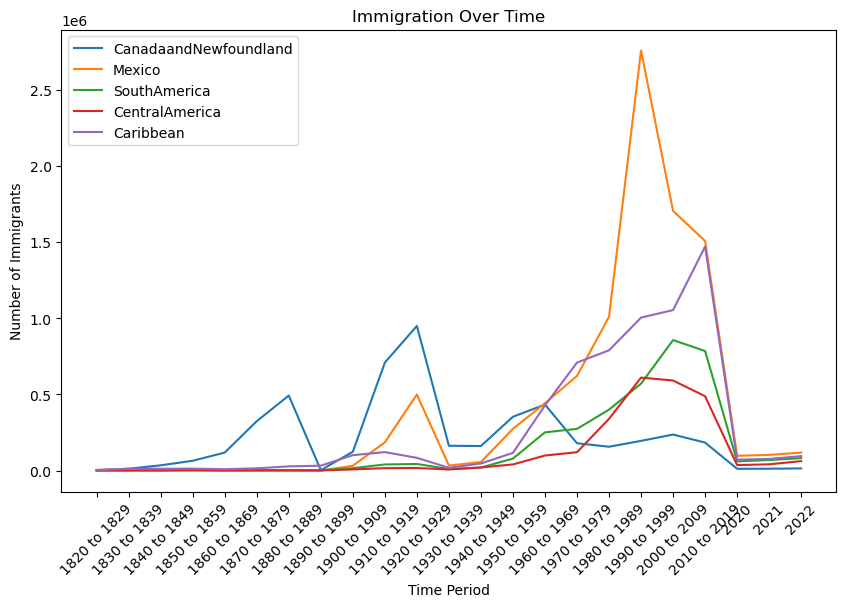

In [16]:
America = ['CanadaandNewfoundland', 'Mexico', 'SouthAmerica', 'CentralAmerica', 'Caribbean']
plot_immigration_over_time(df_all_immigrants, America)

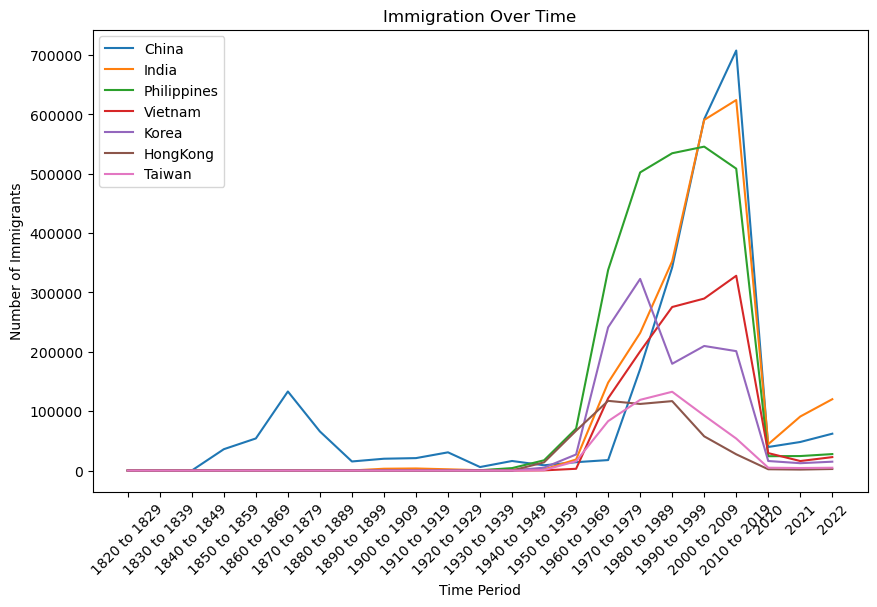

In [17]:
Asia = ['China', 'India', 'Philippines', 'Vietnam', 'Korea', 'HongKong', 'Taiwan']
plot_immigration_over_time(df_all_immigrants, Asia)

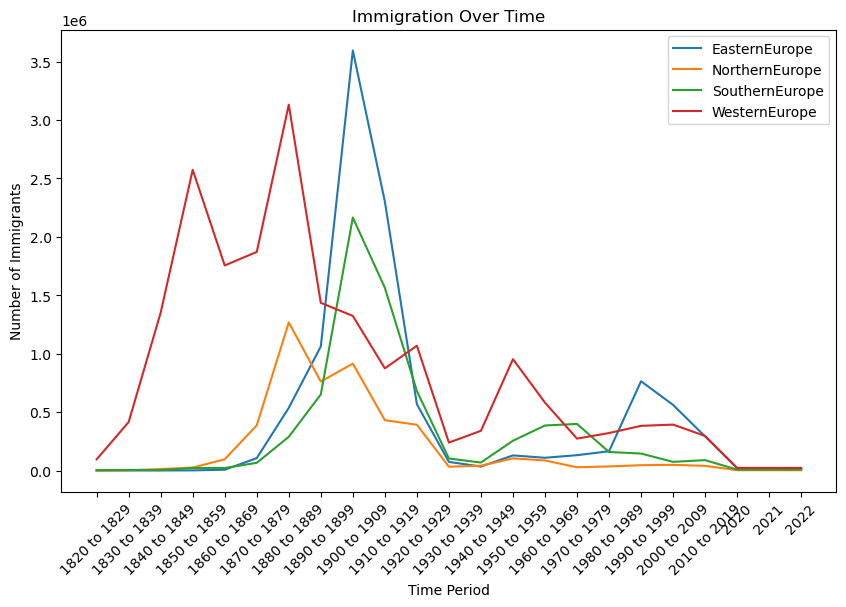

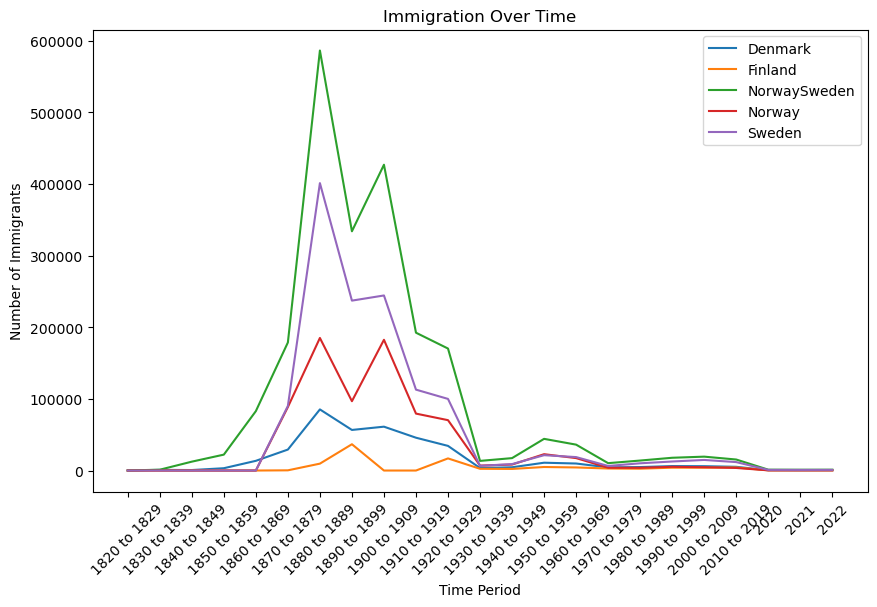

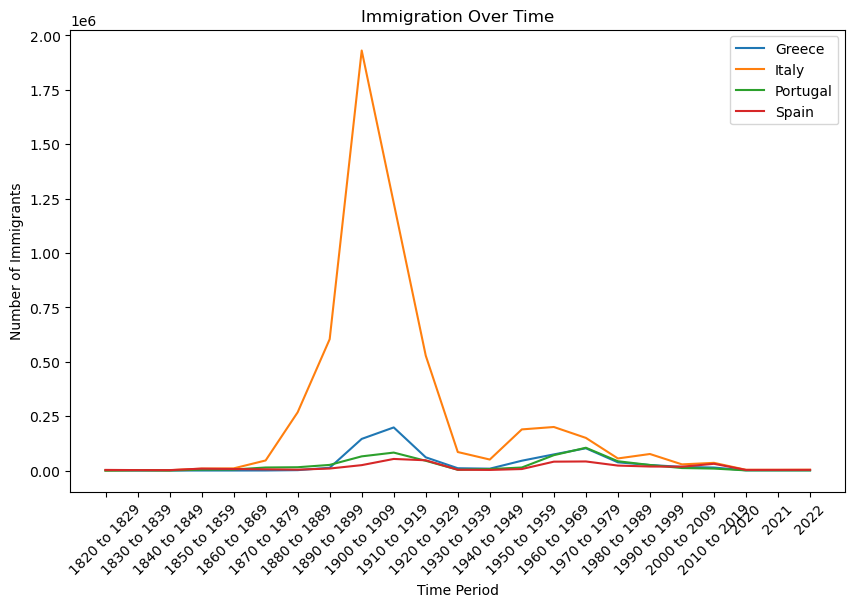

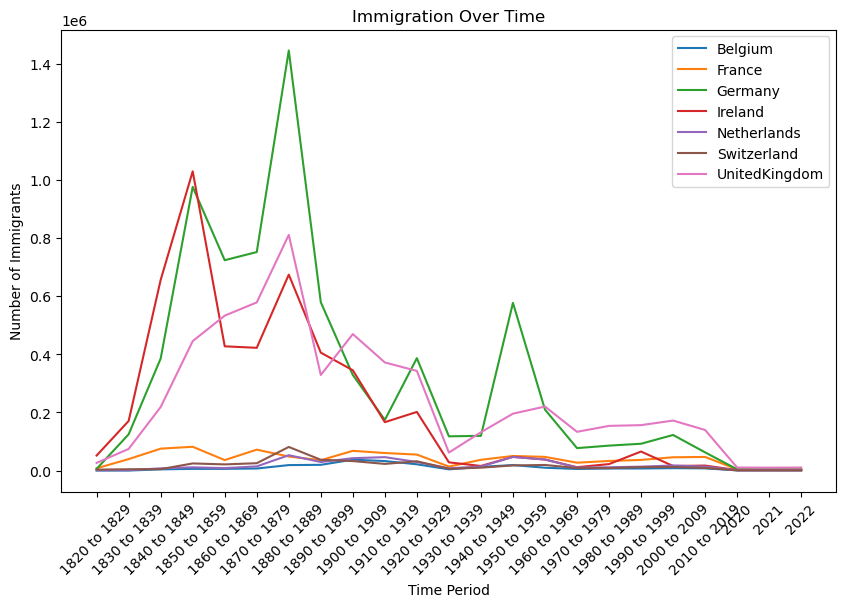

In [20]:
EasternEurope = ["AustriaHungary", "Bulgaria", "Czechoslovakia", "Poland", "Romania", "Russia", "Yugoslavia"]
df_all_immigrants.loc["EasternEurope"] = df_all_immigrants.loc[EasternEurope].sum()
NorthernEurope = ["Denmark", "Finland", "NorwaySweden", "Norway", "Sweden"]
df_all_immigrants.loc["NorthernEurope"] = df_all_immigrants.loc[NorthernEurope].sum()
SouthernEurope = ["Greece", "Italy", "Portugal", "Spain"]
df_all_immigrants.loc["SouthernEurope"] = df_all_immigrants.loc[SouthernEurope].sum()
WesternEurope = ["Belgium", "France", "Germany", "Ireland", "Netherlands", "Switzerland", "UnitedKingdom"]
df_all_immigrants.loc["WesternEurope"] = df_all_immigrants.loc[WesternEurope].sum()
all_Europe = ["EasternEurope", "NorthernEurope", "SouthernEurope", "WesternEurope"]
plot_immigration_over_time(df_all_immigrants, all_Europe)
plot_immigration_over_time(df_all_immigrants, NorthernEurope)
plot_immigration_over_time(df_all_immigrants, SouthernEurope)
plot_immigration_over_time(df_all_immigrants, WesternEurope)

# Green card type

## Overview by year

In [ ]:
file_path = "2023_0818_plcy_yearbook_lawful_permanent_residents_fy2022.xlsx"
df_type = pd.read_excel(file_path, sheet_name='Table 6', skiprows=4, header=1)
df_type.set_index('Type and class of admission', inplace=True)
df_type.dropna(how='all', inplace=True)
# Print the updated index

print(df_type.tail())
print(df_type.index)

## Overview by region (fiscal 2022)

In [ ]:
df_type_region = pd.read_excel(file_path, sheet_name='Table 10d', skiprows=4, header=1)
df_type_region.set_index('Region and country of birth', inplace=True)
df_type_region.dropna(how='all', inplace=True)
# Print the updated index

print(df_type_region.tail())
print(df_type_region.index)

In [ ]:
continents = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America", "Unknown"]

In [ ]:
plot_percentage_pie(df_type_region, continents, 'Total')
plot_percentage_pie(df_type_region, continents, "Immediate relatives of U.S. citizens")
plot_percentage_pie(df_type_region, continents, "Family-sponsored preferences")
plot_percentage_pie(df_type_region, continents, "Employment-based preferences")
plot_percentage_pie(df_type_region, continents, "Diversity")
plot_percentage_pie(df_type_region, continents, "Refugees and asylees")
plot_percentage_pie(df_type_region, continents, "Other")

# Receiving states

In [ ]:
df_receiving_states = pd.read_excel(file_path, sheet_name='LPRSuppTable 1d', skiprows=4, header=1)
df_receiving_states.set_index('Region and country of birth', inplace=True)
df_receiving_states.dropna(how='all', inplace=True)
df_receiving_states.replace('D', np.nan, inplace=True)

print(df_receiving_states.head())
print(df_receiving_states.tail())

In [ ]:
plot_states_bar(df_receiving_states, 'Africa')
plot_states_bar(df_receiving_states, 'Asia')
plot_states_bar(df_receiving_states, 'Europe')


# PERM green card

## prepare data (2008-2023)

In [ ]:
required_columns = ["CASE_STATUS","EMPLOYER_NAME", "WORKSITE_STATE",
                        "PW_SOC_TITLE", "PW_SKILL_LEVEL", "PW_WAGE",
                        "FOREIGN_WORKER_EDUCATION", "FOREIGN_WORKER_INFO_MAJOR",
                        "FOREIGN_WORKER_BIRTH_COUNTRY"]

In [51]:
file_paths = get_all_file_paths("/Users/guoshuyi/Desktop/PERM_data")
print(file_paths)

['/Users/guoshuyi/Desktop/PERM_data/PERM_2022.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2023.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2021.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2009.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2008.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2020.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2018.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2019.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2017.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2016.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2014.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2015.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2011.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2010.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2012.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2013.csv']


In [61]:
qualified_files = []
for file in file_paths:
    qualified_file = check_columns(file, required_columns)
    if qualified_file:
        qualified_files.append(qualified_file)
print(qualified_files)

['/Users/guoshuyi/Desktop/PERM_data/PERM_2022.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2023.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2021.csv', '/Users/guoshuyi/Desktop/PERM_data/PERM_2020.csv']


In [79]:
dfs = {}  # Dictionary to store the DataFrames

for file_path in qualified_files:
    file_name = file_path.split('/')[-1]  # Extract the file name from the file path
    df = pd.read_csv(file_path, usecols= required_columns)  # Read the CSV file into a DataFrame
    df['Year'] = file_name.split('.')[0].split("_")[1]  # Add a new column to store the file name
    dfs[file_name] = df  # Store the DataFrame in the dictionary with the file name as the key

In [81]:
# Concatenate all the dataframes in the dictionary into a single dataframe
df = pd.concat(dfs.values(), ignore_index=True)

In [82]:
print(df.head())
print(df.tail())

         CASE_STATUS             EMPLOYER_NAME  \
0  Certified-Expired           VIGO INDUSTRIES   
1  Certified-Expired  VESUVIUS USA CORPORATION   
2  Certified-Expired     Kikkerland Design Inc   
3  Certified-Expired                 yalai inc   
4  Certified-Expired            VIACOMCBS INC.   

                                PW_SOC_TITLE PW_SKILL_LEVEL      PW_WAGE  \
0                         Marketing Managers       Level II  $153,296.00   
1                         Marketing Managers        Level I   $87,027.00   
2                          Director of Sales       Level II  $152,901.00   
3           Administrative Services Managers       Level II   $95,285.00   
4  Computer and Information Systems Managers       Level IV  $232,024.00   

  WORKSITE_STATE FOREIGN_WORKER_BIRTH_COUNTRY FOREIGN_WORKER_EDUCATION  \
0       NEW YORK                        CHINA                 Master's   
1   PENNSYLVANIA                       BRAZIL               Bachelor's   
2       NEW YORK    

Since the columns of each year data are slightly different, I have to read them one by one, keep the necessary columns and rename them.

In [ ]:
df_PERM_2023 = pd.read_csv("/Users/guoshuyi/Desktop/PERM_data/PERM_2023.csv", 
                           usecols= ["CASE_STATUS","EMPLOYER_NAME", "EMPLOYER_CITY", "EMPLOYER_STATE_PROVINCE", "WORKSITE_STATE",
                                     "PW_SOC_TITLE", "PW_SKILL_LEVEL", "PW_WAGE",
                                     "MINIMUM_EDUCATION", "MAJOR_FIELD_OF_STUDY", "FOREIGN_WORKER_EDUCATION", "FOREIGN_WORKER_INFO_MAJOR",
                                     "FOREIGN_WORKER_BIRTH_COUNTRY"])
df_PERM_2023 = df_PERM_2023.rename(columns={
    'CASE_STATUS': 'case_status',
    'EMPLOYER_NAME': 'employer_name',
    'EMPLOYER_CITY': 'employer_city',
    'EMPLOYER_STATE_PROVINCE': 'employer_state_province',
    'WORKSITE_STATE': 'worksite_state',
    'PW_SOC_TITLE': 'title',
    'PW_SKILL_LEVEL': 'level',
    'PW_WAGE': 'wage',
    'FOREIGN_WORKER_EDUCATION': 'education',
    'FOREIGN_WORKER_INFO_MAJOR': 'major',
    'FOREIGN_WORKER_BIRTH_COUNTRY': 'birth_country'
})

In [16]:
df_PERM_2022 = pd.read_csv("/Users/guoshuyi/Desktop/PERM_data/PERM_2022.csv", 
                           usecols= ["CASE_STATUS","EMPLOYER_NAME", "EMPLOYER_CITY", "EMPLOYER_STATE_PROVINCE", "WORKSITE_STATE",
                                     "PW_SOC_TITLE", "PW_SKILL_LEVEL", "PW_WAGE",
                                     "MINIMUM_EDUCATION", "MAJOR_FIELD_OF_STUDY", "FOREIGN_WORKER_EDUCATION", "FOREIGN_WORKER_INFO_MAJOR",
                                     "FOREIGN_WORKER_BIRTH_COUNTRY"])
df_PERM_2022 = df_PERM_2022.rename(columns={
    'CASE_STATUS': 'case_status',
    'EMPLOYER_NAME': 'employer_name',
    'EMPLOYER_CITY': 'employer_city',
    'EMPLOYER_STATE_PROVINCE': 'employer_state_province',
    'WORKSITE_STATE': 'worksite_state',
    'PW_SOC_TITLE': 'title',
    'PW_SKILL_LEVEL': 'level',
    'PW_WAGE': 'wage',
    'FOREIGN_WORKER_EDUCATION': 'education',
    'FOREIGN_WORKER_INFO_MAJOR': 'major',
    'FOREIGN_WORKER_BIRTH_COUNTRY': 'birth_country'
})

### 2023

There're slight differences between the column names of each year's data. 

In [ ]:
for columns in file_columns:
    print(columns)

As we can see, the column names are different. we need to normalize them.

In [7]:
df_PERM_2023 = pd.read_csv("/Users/guoshuyi/Desktop/PERM_data/PERM_2023.csv", 
                           usecols= ["CASE_STATUS","EMPLOYER_NAME", "EMPLOYER_CITY", "EMPLOYER_STATE_PROVINCE", "WORKSITE_STATE",
                                     "PW_SOC_TITLE", "PW_SKILL_LEVEL", "PW_WAGE",
                                     "MINIMUM_EDUCATION", "MAJOR_FIELD_OF_STUDY", "FOREIGN_WORKER_EDUCATION", "FOREIGN_WORKER_INFO_MAJOR",
                                     "FOREIGN_WORKER_BIRTH_COUNTRY"])
print(df_PERM_2023.head())

         CASE_STATUS               EMPLOYER_NAME EMPLOYER_CITY  \
0          Withdrawn     Westgate Shellworld Inc       Orlando   
1  Certified-Expired                  NIKE, INC.     BEAVERTON   
2             Denied     RIVERY TECHNOLOGIES INC      NEW YORK   
3  Certified-Expired                   ESRI INC.      REDLANDS   
4  Certified-Expired  INGURAN LLC DBA STGENETICS      NAVASOTA   

  EMPLOYER_STATE_PROVINCE             PW_SOC_TITLE PW_SKILL_LEVEL  \
0                 FLORIDA      RETAIL SALESPERSONS        Level I   
1                  OREGON       Marketing Managers       Level IV   
2                NEW YORK  Chief Executive Officer       Level IV   
3              CALIFORNIA       Marketing Managers      Level III   
4                   TEXAS       Marketing Managers       Level IV   

       PW_WAGE WORKSITE_STATE MINIMUM_EDUCATION  \
0   $20,758.00        FLORIDA               NaN   
1  $167,378.00         OREGON          Master's   
2  $224,307.00       NEW YORK      

Text(0.5, 1.0, 'Top 10 Countries of Origin for Approved PERM Applications')

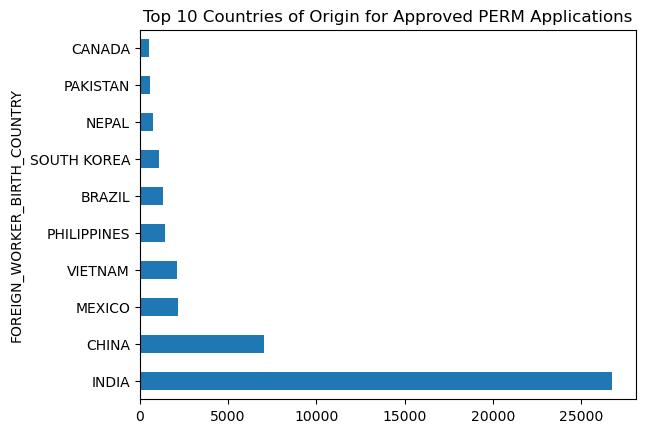

In [12]:
approvals = df_PERM_2023[df_PERM_2023["CASE_STATUS"] == 'Certified']
rejections = df_PERM_2023[df_PERM_2023["CASE_STATUS"] == 'Denied']

# Group by country of origin and count
approvals_by_country = approvals.groupby("FOREIGN_WORKER_BIRTH_COUNTRY").size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Countries of Origin for Approved PERM Applications")

Approvals by country:
Axes(0.125,0.11;0.775x0.77)

Rejections by country:
Axes(0.125,0.11;0.775x0.77)


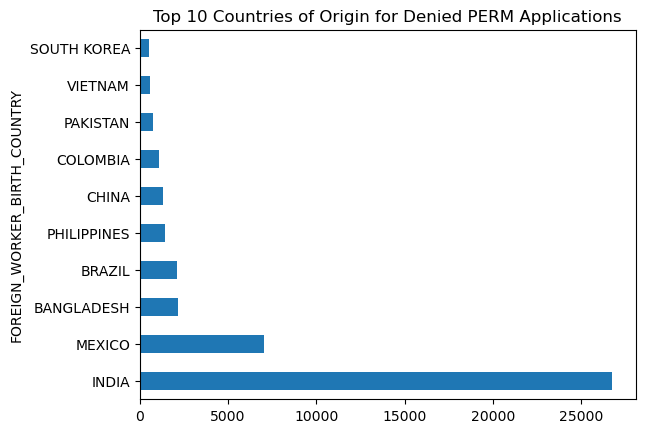

In [11]:
approvals = df_PERM_2023[df_PERM_2023["CASE_STATUS"] == 'Certified']
rejections = df_PERM_2023[df_PERM_2023["CASE_STATUS"] == 'Denied']

# Group by country of origin and count
approvals_by_country = approvals.groupby("FOREIGN_WORKER_BIRTH_COUNTRY").size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Countries of Origin for Approved PERM Applications")

rejections_by_country = rejections.groupby("FOREIGN_WORKER_BIRTH_COUNTRY").size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Countries of Origin for Denied PERM Applications")

# # Print the results
# print("Approvals by country:")
# print(approvals_by_country)
# print("\nRejections by country:")
# print(rejections_by_country)

Text(0.5, 1.0, 'Top 10 Countries/regions of Birth of Foreign Workers in 2023')

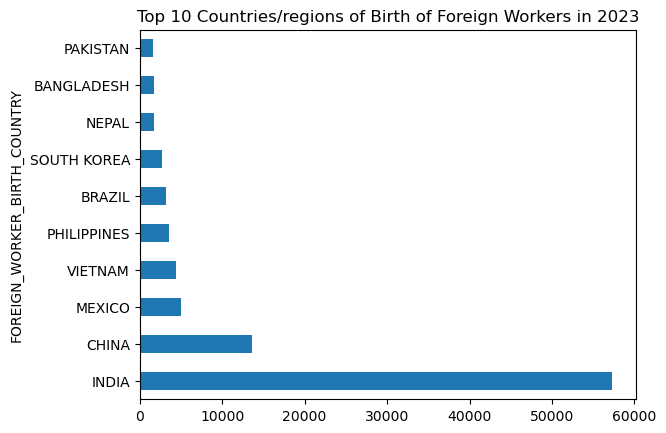

In [6]:
df_PERM_2023.groupby("FOREIGN_WORKER_BIRTH_COUNTRY").size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Countries/regions of Birth of Foreign Workers in 2023")

In [ ]:
df_PERM_2023.groupby("PW_SOC_TITLE").size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 SOC Titles of Foreign Workers in 2023")

In [ ]:
df_PERM_2023.groupby("WORKSITE_STATE").size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 States with the Most Foreign Workers (2023)")

In [ ]:
df_PERM_2023.groupby("MAJOR_FIELD_OF_STUDY").size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Major Fields of Study of Foreign Workers (2023)")

In [ ]:
df_PERM_2023.groupby("FOREIGN_WORKER_EDUCATION").size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Education Levels of Foreign Workers (2023)")

In [ ]:
df_PERM_2023[df_PERM_2023["FOREIGN_WORKER_EDUCATION"] == "Bachelor's"].groupby("WORKSITE_STATE").size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 States with the Most Foreign Workers with Bachelor's Degree (2023)")

In [ ]:
df_PERM_2023[df_PERM_2023["FOREIGN_WORKER_EDUCATION"] == "Master's"].groupby("FOREIGN_WORKER_BIRTH_COUNTRY").size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Countries/regions of Birth of Foreign Workers with Master's Degree (2023)")

In [ ]:
df_PERM_2023[df_PERM_2023["FOREIGN_WORKER_EDUCATION"] == "Master's"].groupby("WORKSITE_STATE").size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 States with the Most Foreign Workers with Master's Degree")

In [ ]:
df_PERM_2023[df_PERM_2023["FOREIGN_WORKER_EDUCATION"] == "High School"].groupby("FOREIGN_WORKER_BIRTH_COUNTRY").size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Countries of Birth of Foreign Workers with High School Education")

In [ ]:
df_PERM_2023[df_PERM_2023["FOREIGN_WORKER_EDUCATION"] == "High School"].groupby("WORKSITE_STATE").size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 States with the Most Foreign Workers with High School Education")

In [ ]:
df_PERM_2023[df_PERM_2023["FOREIGN_WORKER_EDUCATION"] == "High School"].groupby("FOREIGN_WORKER_BIRTH_COUNTRY").size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Countries of Birth of Foreign Workers with High School Education")
df_PERM_2023[df_PERM_2023["FOREIGN_WORKER_EDUCATION"] == "High School"].groupby("WORKSITE_STATE").size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 States with the Most Foreign Workers with High School Education")

### 2008

In [ ]:
df_PERM_2008 = pd.read_csv("PERM_data/PERM_2008.csv", 
                           usecols= ["EMPLOYER_NAME", "EMPLOYER_CITY", "EMPLOYER_STATE", 'JOB_INFO_WORK_STATE',
                                     'PW_JOB_TITLE_9089', 'PW_LEVEL_9089', 'WAGE_OFFER_UNIT_OF_PAY_9089',
                                     'COUNTRY_OF_CITZENSHIP'])

In [ ]:
df_PERM_2008.groupby('JOB_INFO_WORK_STATE').size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 States with the Most Foreign Workers (2008)")

In [ ]:
df_PERM_2008.groupby("COUNTRY_OF_CITZENSHIP").size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Countries/regions of Citizenship of Foreign Workers in 2008")

In [ ]:
df_PERM_2008.groupby('PW_JOB_TITLE_9089').size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Job Titles of Foreign Workers in 2008")

### 2015

In [ ]:
# df_PERM_2015 = pd.read_csv("PERM_data/PERM_2015.csv", 
#                            usecols= ["EMPLOYER_NAME", "EMPLOYER_CITY", "EMPLOYER_STATE", 'JOB_INFO_WORK_STATE',
#                                      'PW_SOC_TITLE', 'PW_LEVEL_9089', "PW_AMOUNT_9089",
#                                      "FOREIGN_WORKER_INFO_MAJOR", "FOREIGN_WORKER_INFO_EDUCATION",
#                                      'COUNTRY_OF_CITZENSHIP', 'FW_INFO_BIRTH_COUNTRY'])
df_PERM_2015 = pd.read_csv("PERM_data/PERM_2015.csv")
print(df_PERM_2015.columns.tolist())

In [ ]:
df_PERM_2015 = pd.read_csv("PERM_data/PERM_2015.csv", 
                           usecols= ["EMPLOYER_NAME", "EMPLOYER_CITY", "EMPLOYER_STATE", 'JOB_INFO_WORK_STATE',
                                     'PW_SOC_TITLE', 'PW_LEVEL_9089', "PW_AMOUNT_9089",
                                     "FOREIGN_WORKER_INFO_MAJOR", "FOREIGN_WORKER_INFO_EDUCATION",
                                     'COUNTRY_OF_CITIZENSHIP', 'FW_INFO_BIRTH_COUNTRY'])

In [ ]:
df_PERM_2015.groupby('PW_SOC_TITLE').size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 SOC Titles of Foreign Workers in 2015")

In [ ]:
df_PERM_2015.groupby('FW_INFO_BIRTH_COUNTRY').size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Countries/regions of Birth of Foreign Workers in 2015")

In [ ]:
df_PERM_2015.groupby('JOB_INFO_WORK_STATE').size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 States with the Most Foreign Workers in 2015")

In [ ]:
df_PERM_2015.groupby("FOREIGN_WORKER_INFO_EDUCATION").size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Education Levels of Foreign Workers in 2015")